# Practical 6

## Aim : Perform EDA on wine dataset. Use PCA  to deduce principal components from it. Finally perform classification using logistic regression to find accuracy and classification report for the model built.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn.datasets as data
from sklearn.datasets import load_wine
wine_data = load_wine()
dataset = pd.DataFrame(wine_data.data)
print("Features Name : ", wine_data.feature_names)
print("Target Name : ", wine_data.target_names)
print("Dataset Shape : ", dataset.shape)
dataset.head()

Features Name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Name :  ['class_0' 'class_1' 'class_2']
Dataset Shape :  (178, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [4]:
wine_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
df = dataset.set_axis(wine_data.feature_names, axis=1, inplace=False)

In [6]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<AxesSubplot: >

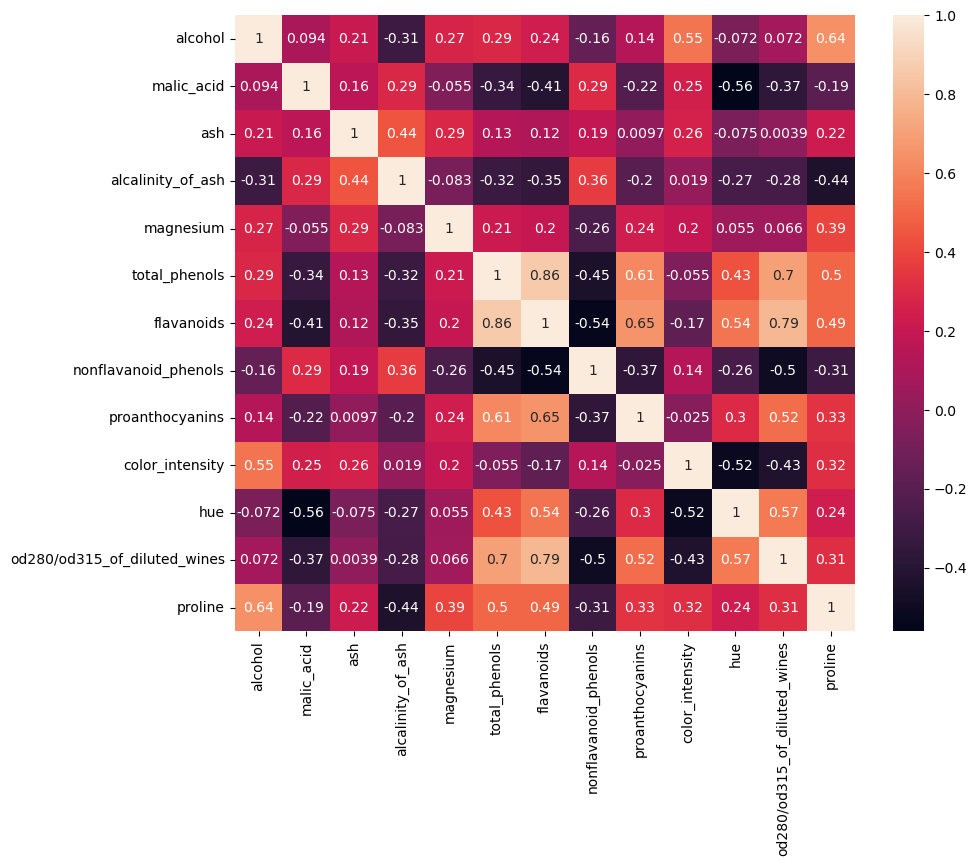

In [7]:
plt.figure(figsize = (10,8) )
sns.heatmap(df.corr(),annot=True)

In [8]:
x = dataset.values [ : , 0:13]
y = wine_data.target

In [9]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [10]:
from sklearn.decomposition import PCA

In [11]:
# PCA class using sklearn
pca = PCA()
pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [12]:
pca_reduced = PCA(n_components = 2)
pca_new = pca_reduced.fit_transform(x)
print(pca_reduced.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [13]:
pca_new.shape

(178, 2)

In [14]:
#Creating a DataFrame of reduced Dataset
new_df = pd.DataFrame(pca_new , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
new_df = pd.concat([new_df , pd.DataFrame(y)] , axis = 1)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

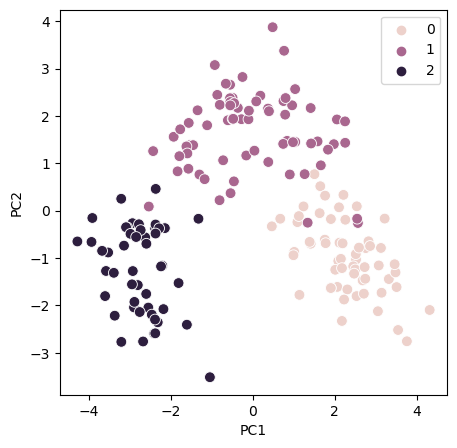

In [15]:
# Plot the data projected onto Principal Components
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = new_df , x = 'PC1',y = 'PC2' , hue = y , s = 60)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_df, y, test_size = 0.25, random_state = 3)

In [17]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 3)

classifier.fit(x_train,y_train)

LogisticRegression(random_state=3)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n" , cm)

Confusion Matrix : 
 [[18  0  0]
 [ 0 17  1]
 [ 0  0  9]]


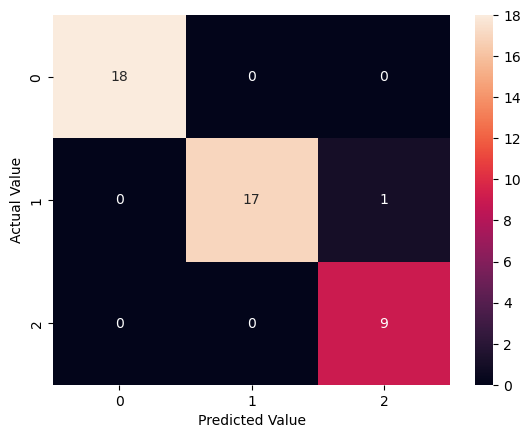

In [20]:
sb.heatmap(cm, annot = True)  # Creating heatmap between actual welding and predicted value Also known as confusion matrix
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [21]:
import sklearn.metrics as metrics  # Finding accuracy precision and recall.
print ('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9777777777777777


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

